In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df.head()


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


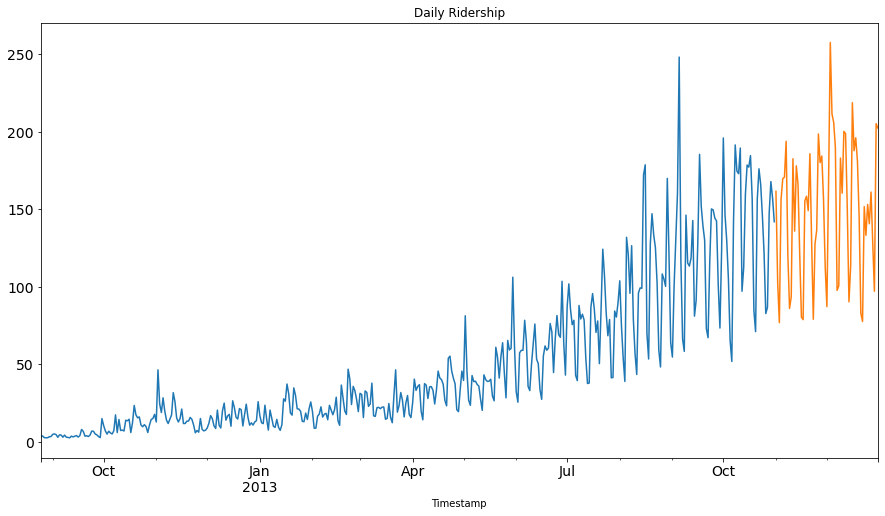

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Subsetting the dataset
# Index 11856 marks the end of year 2013
df = pd.read_csv('train.csv', nrows=11856)
# Creating train and test set
# Index 10392 marks the end of October 2013
train = df[0:10392]
test = df[10392:]
# Aggregating the dataset at daily level
df['Timestamp'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.index = df['Timestamp']
df = df.resample('D').mean()
train['Timestamp'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']
train = train.resample('D').mean()
test['Timestamp'] = pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')
test.index = test['Timestamp']
test = test.resample('D').mean()
#Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [3]:
df.head()

,ID,Count
Timestamp,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


In [4]:
train

,ID,Count
Timestamp,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000
...,...,...
2013-10-27,10283.5,86.750000
2013-10-28,10307.5,147.333333
2013-10-29,10331.5,167.916667


https://www.biaodianfu.com/python-time-series-forecasting-methods.html
时间序列预测的7种方法


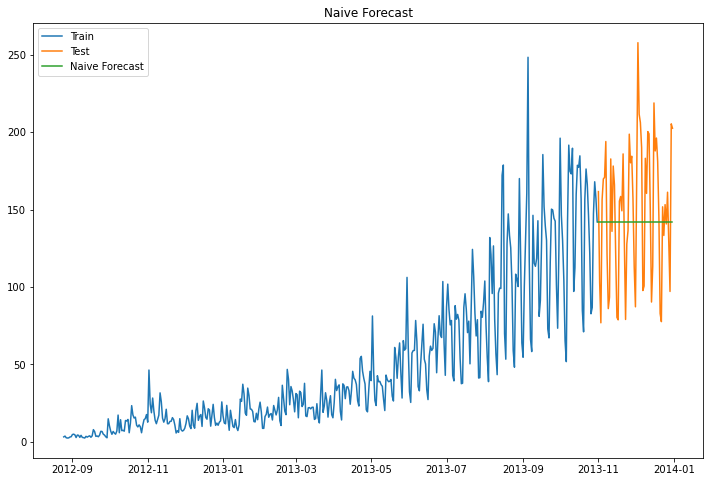

In [5]:
# 朴素法
dd = np.asarray(train['Count'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd) - 1]
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Count'], y_hat['naive']))
print(rms)


43.91640614391676


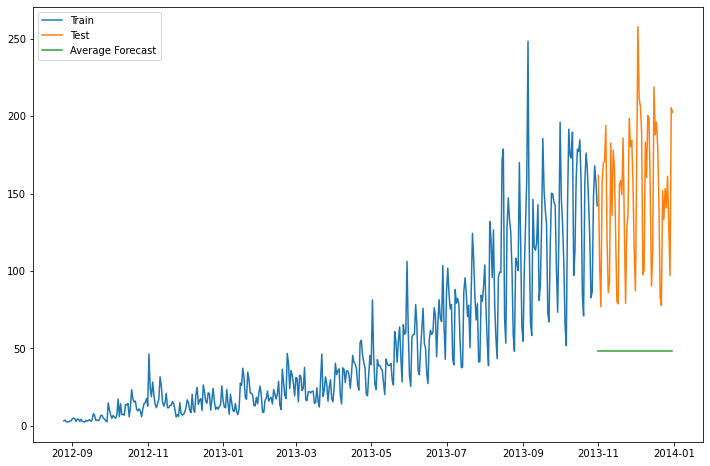

In [7]:
#平均法
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['avg_forecast']))
print(rms)

109.88526527082863


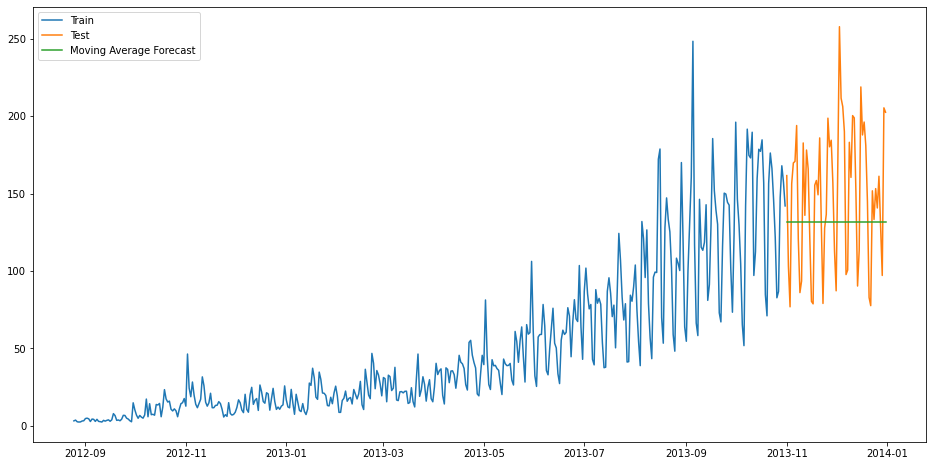

In [9]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['moving_avg_forecast']))
print(rms)

46.72840725106963


D:\Anaconda3\envs\pt38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


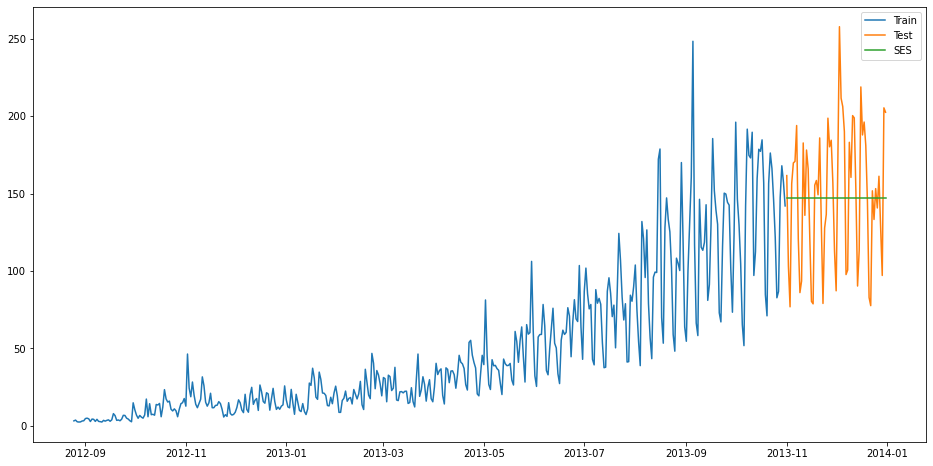

In [11]:
#简单指数平滑法
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat_avg = test.copy()
fit = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['SES']))
print(rms)

43.357625225228155


霍尔特(Holt)线性趋势法

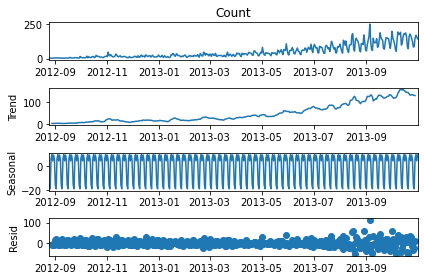

In [13]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['Count']).plot()
result = sm.tsa.stattools.adfuller(train['Count'])
plt.show()

D:\Anaconda3\envs\pt38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-14-8dacacbd692b>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit = Holt(np.asarray(train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)


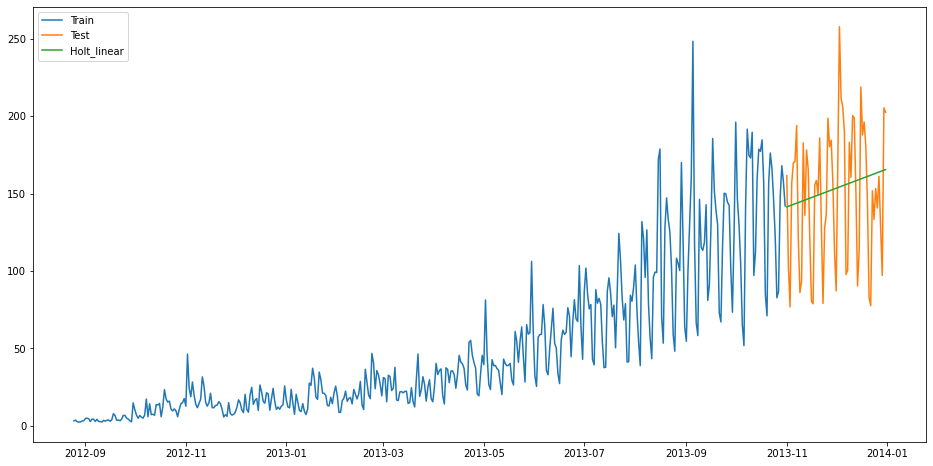

In [14]:
from statsmodels.tsa.api import Holt
y_hat_avg = test.copy()
fit = Holt(np.asarray(train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

D:\Anaconda3\envs\pt38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


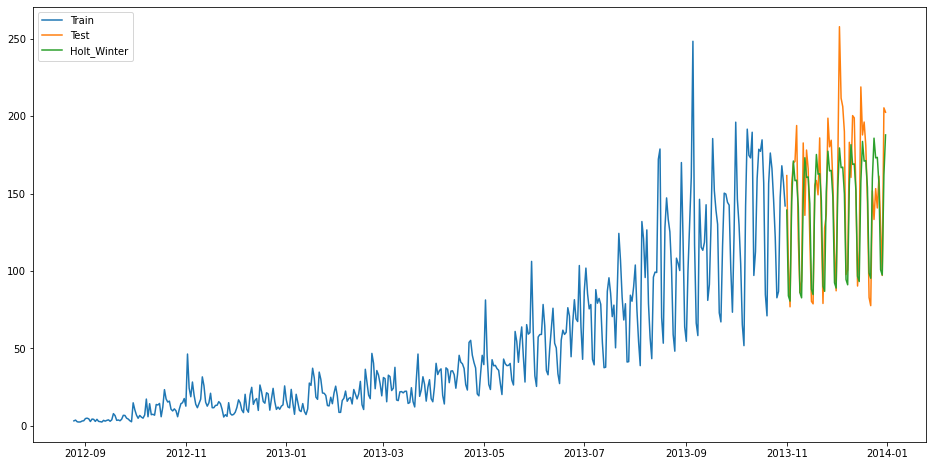

In [15]:
#Holt-Winters季节性预测模型

from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']), seasonal_periods=7, trend='add', seasonal='add', ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['Holt_Winter']))
print(rms)

25.26547189347757


D:\Anaconda3\envs\pt38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


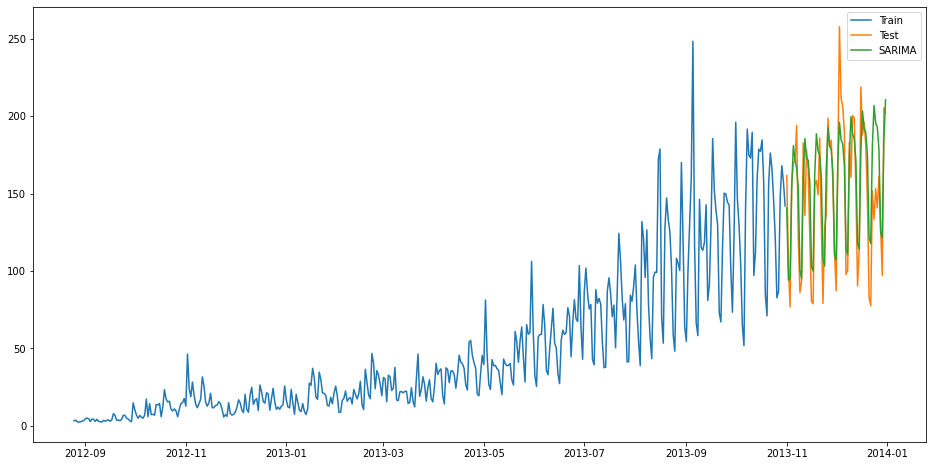

In [17]:
#自回归移动平均模型（ARIMA）
import statsmodels.api as sm
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['SARIMA']))
print(rms)

26.04156494450014
